MoGPL project by Latifa LECHLECH


import libaries

In [ ]:
pip install igraph

In [ ]:
pip install cairocffi

In [ ]:
pip install pycairo 

In [1]:
import numpy as np
import pandas as pd
import igraph as ig
from igraph import *

In [2]:
class Graph:
    # Orienterd Graph (graphe orienté pondéré)
    def __init__(self,V):
        # Vertex (sommets) 
        self.V = V
        # Initilalize the 
        self.adj_matrix = np.array([[0]*V for _ in range(V)])

        self.weight = np.array([[0]*V for _ in range(V)])

    def add_edges(self,v1, v2,weight):
        self.adj_matrix[v1][v2] = 1
        self.weight[v1][v2] = weight

    def adjacency_matrix(self):
        return self.adj_matrix     

In [2]:
class Shortest_path(Graph):
    def __init__(self,V):
        super().__init__(V)


    def ballman_Ford(self):
        pass

In [ ]:
def generate_graph(self):
        pass 

In [3]:
labels = ['A', 'B', 'C', 'D', 'E']

g = Graph(V=5)

g.add_edges(0,1,6)
g.add_edges(0,2,3)
g.add_edges(1,3,8)
g.add_edges(1,4,1)
g.add_edges(2,1,2)
g.add_edges(3,1,1)
g.add_edges(3,4,-5)  # g.add_edges(3,4,-5)
g.add_edges(4,2,2)

adjacency_matrix = g.adjacency_matrix() 
adjacency_matrix_df = pd.DataFrame(adjacency_matrix, columns=labels, index=labels)
print(adjacency_matrix_df)

weights = g.weight
weight_df = pd.DataFrame(weights, columns=labels, index=labels)
print(weight_df)

   A  B  C  D  E
A  0  1  1  0  0
B  0  0  0  1  1
C  0  1  0  0  0
D  0  1  0  0  1
E  0  0  1  0  0
   A  B  C  D  E
A  0  6  3  0  0
B  0  0  0  8  1
C  0  2  0  0  0
D  0  1  0  0 -5
E  0  0  2  0  0


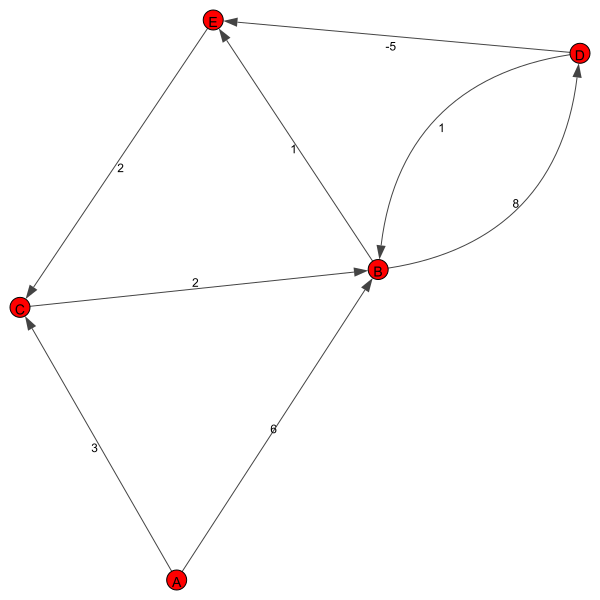

In [4]:
# Get the values as np.array, it's more convenenient.
A = adjacency_matrix_df.values
# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
g_test = ig.Graph.Adjacency((A > 0).tolist())

# Add edge weights and node labels.
g_test.vs['label'] = labels
g_test.es["weight"] = g.weight.flatten()[g.weight.flatten() != 0].tolist()
layout = g_test.layout(layout='auto')
plot(g_test, layout=layout,edge_label=g_test.es["weight"])

In [65]:
def relax(g, d):
    # Find indices where value is equal to 1
    edges = np.where(adjacency_matrix == 1)
    edges = list(zip(edges[0], edges[1]))

    for i in range(1,g.V):
        # Relax        
        for edge in edges:
            u = edge[0]
            v = edge[1]
            d_2 = d[i-1,u,0] + g.weight[u,v]
            if d[i,v,0] > d_2:
                d[i,v,0] = d_2
                d[i,v,1] = u
        if np.array_equal(d[i-1],d[i]):
            return i,d
        i = i+ 1 
    return i,d

In [66]:
def ballman_Ford(g):
    # Initialization
    d = np.full((g.V,g.V,2), np.inf)  # d and node that it came from
    d[:,0,0] = np.zeros((g.V))

    i,d = relax(g, d)
    
    # Control if a negative cycle exist 
    #print(d)

    stop_node = g.V-1 # 4 
    path_list = [stop_node]
    current_node = stop_node
    for j in range(1,g.V-1):
        #print(i)
        #print(d[g.V-i,current_node,1])
        previous_node = int(d[g.V-j,current_node,1])
        path_list = np.append(path_list,previous_node)
        current_node = previous_node
        
    path_list = np.flip(path_list)  
    return path_list,i

In [67]:

def edges_color(g,g_test,path_edges_list):
    # Get the edge IDs for edges AB and BC
    edge_indices = path_edges_list[1:]

    # Define edge colors for AB and BC
    edge_colors = ["red" if i in edge_indices else "black" for i in range(len(g_test.es))]

    # Plot the graph with colored edges
    visual_style = {
        "vertex_color": "lightblue",
        "edge_color": edge_colors,
        "edge_width": 2,
        "bbox": (300, 300),
        "margin": 20
    }

    return plot(g_test, layout=layout,edge_label=g_test.es["weight"],**visual_style)

Number of iteration 4
Shortest path [0 2 1 4]


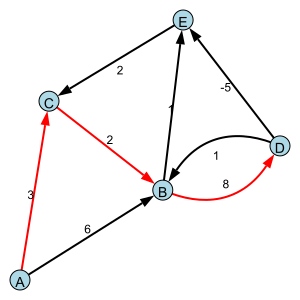

In [68]:
path_edges_list,i  = ballman_Ford(g)
print("Number of iteration",i)
print("Shortest path",path_edges_list)
edges_color(g,g_test,path_edges_list)

----


The number of iterations in the Bellman-Ford algorithm is primarily determined by the number of vertices in the graph and the existence of negative-weight cycles. The algorithm guarantees convergence after V-1 iterations where V is the number of vertices in the graph, assuming there are no negative-weight cycles reachable from the source vertex.

However, in some cases, the algorithm may converge in fewer than V-1 iterations:

Early termination: If the algorithm has converged, meaning no distance value is updated in a particular iteration, it can terminate before completing all V-1 iterations.

Optimizations: For certain graph structures or specific inputs, the algorithm might converge earlier due to optimizations or the absence of edges that trigger updates.

Sparse graphs: In a sparse graph (a graph with relatively few edges compared to the number of vertices), there might be fewer updates in each iteration, potentially leading to fewer total iterations required for convergence.